# Uses of Differential Equations in Analog Electronics, Specifically in Simple RC Circuits and Low-pass Filters

Note: $i$ and $I$ are defined as symbols representing current, while $j^2\equiv-1$ (i.e. by definition). (I hope we're not using quaternions...)

## What is Charge?

For this presentation, understanding charge as the integral of current over time as sufficient. They also form an integral () part of capacitors' behaviour.

## What is a Capacitor?

A capacitor (or condenser) relates voltage ($V$) and charge ($q$): $VC=q$ and $dq=Idt$. This is in contrast to resistors ($dv=Rdi$) and inductors ($d\phi=Ldi$).

If you imagine electronics to be analogous to water-things: \[1] \[2]
- wire is water pipe
- charge (C) is water, electrons are water molecules
- resistor is water pipe with a filter (i.e. high resistance)
- capacitor is a springed piston with pipes at both ends
- inductor is a momentum-increaser
- voltage (V, J/C) is water pressure
- current (A, C/s) is water flow

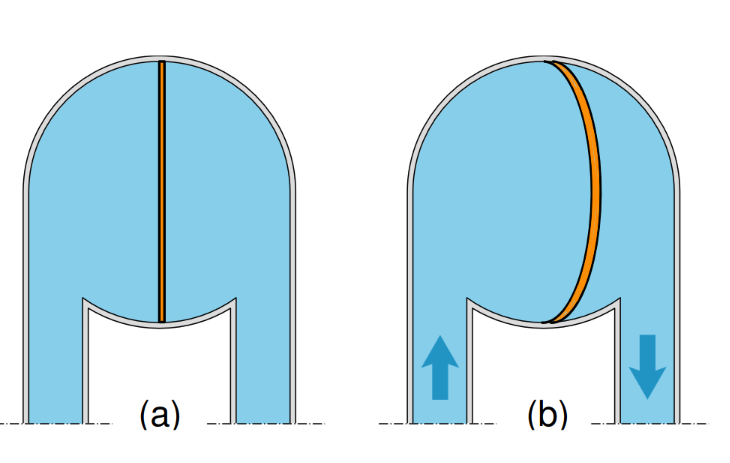

In `(a)`, there is no water flow and no voltage (pressure) difference between the two pipes.
Once we start putting water into the left pipe, the membrane is flexed to the right, resisting more flow as the pressure of the left side increases.

This is similar to the differential equation we use to describe capacitors:

($V$ is the difference in electric potential between the two legs (`(a)` and `(b)` in the figure above) of the capacitor, where)
$$V=\frac{q}{C}=\frac{\int Idt}C$$
As charge increases (as we keep on putting current into the capacitor), the voltage between the capacitor increases.

## Creating an RC Circuit - Charging a Capacitor

If we connect a capacitor to a current source without a resistor (note that this is practically impossible), there will be undefined (or infinite) current flow.
Also note that every component of a circuit has some combination of resistance, capacitance, etc, meaning we have to model this in as well. This is called an RC circuit, since it has both a resistor and capacitor.

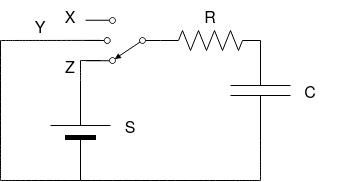

$t : \text{seconds}$

$R : \ohm$

$C : \text{F}$

$V_S : \text{V}$

Using Kirchhoff's Voltage Law, we can say
$$V_S-V_R-V_C=0$$.
Now substituting $q=\int Idt$ and $V=\frac qC$,
$$V_S-\frac{dq}{dt}R-\frac qC=0$$.

$$V_S-\frac qC=\frac{dq}{dt}R$$
$$\frac{CV_S-q}{RC}=\frac{dq}{dt}$$
$$\frac1{RC}=\frac1{CV_S-q}\frac{dq}{dt}$$
$$\int_0^{t}\frac1{RC}dt=\int_0^{t}\frac1{CV_S-q}dq$$
($V_S$, $R$, $C$ are constant.)
$$k+\frac t{RC}=-\int_0^{q}\frac1{CV_S-q}d(CV_S-q)$$
$$k+\frac t{RC}=-(\ln(CV_S-q)-\ln(CV_S))$$
$$k+\frac t{RC}=-\ln(\frac{CV_S-q}{CV_S}$$
$$e^{k+\frac{-t}{RC}}=\frac{CV_S-q}{CV_S}$$
$$-CV_Se^{k+\frac{-t}{RC}}+CV_S=q$$
$$q=CV_S(1-e^{k+\frac{-t}{RC}})$$
Set initial charge to be zero,
$$q(0)=0$$
$$0=CV_S(1-e^k)$$
$$0=1-e^k$$
$$e^k=1$$
$$k=\ln(1)=0$$
$$q(t)=CV_S(1-e^{\frac{-t}{RC}})$$

Let's plot the graph numerically, using $R=10k\ohm$, $C=100\text{mF}$, and $V_S=5\text{V}$.

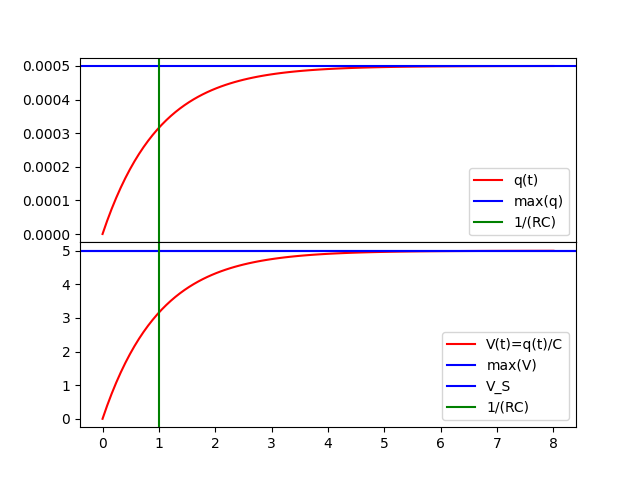

In [2]:
%matplotlib widget
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np

R = 10e3
C = 100e-6
V_S = 5
q = lambda t: C*V_S*(1-np.exp(-t/(R*C)))
t = np.linspace(0, 8/(R*C), 100)

plt.ion()
fig = plt.figure("Figure 1: Charge and voltage of a charging RC circuit with respect to time")
gs = gridspec.GridSpec(2, 1, height_ratios=[1]*2)

sp0 = plt.subplot(gs[0])
sp0.plot(t, q(t), label='q(t)', color='red')
sp0.axhline(y=C*V_S, label='max(q)', color='blue')
sp0.axvline(x=1/(R*C), label='1/(RC)', color='green')
sp0.legend(loc='lower right')

sp1 = plt.subplot(gs[1])
sp1.plot(t, q(t)/C, label='V(t)=q(t)/C', color='red')
sp1.axhline(y=V_S, label='max(V)', color='blue')
sp1.axhline(y=V_S, label='V_S', color='blue')
sp1.axvline(x=1/(R*C), label='1/(RC)', color='green')
sp1.legend(loc='lower right')
plt.subplots_adjust(hspace=.0)
plt.show()

## Discharging a Capacitor

Let $$Q$$ represent the initial charge.
$$V_R+V_C=0$$.
Now substituting $q=\int Idt$ and $V=\frac qC$,
$$\frac{dq}{dt}R+\frac qC=0$$.
$$\frac1q\frac{dq}{dt}=-\frac1{RC}$$
Integrate both sides with respect to $t$,
$$k+\ln q=\frac -t{RC}$$.
$$\ln q=\frac -t{RC}+k$$
$$q=e^(\frac -t{RC})e^k$$
$$Q\equiv q(0)$$
$$Q=e^(\frac -(0){RC})e^k$$
$$Q=e^k$$
$$q=Qe^\frac{-t}{RC}$$

Let's plot the graph numerically, using $Q=CV_S$, $R=10k\ohm$, $C=100\text{mF}$, and $V_S=5\text{V}$.

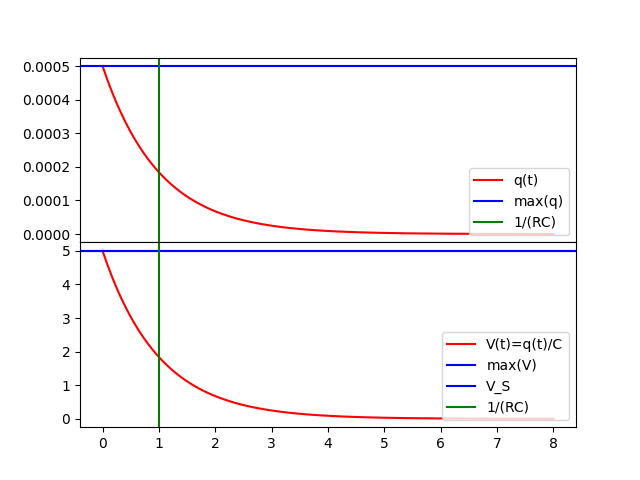

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np

R = 10e3
C = 100e-6
V_S = 5
Q = C*V_S
q = lambda t: Q*np.exp(-t/(R*C))
t = np.linspace(0, 8/(R*C), 100)

plt.ion()
fig = plt.figure("Figure 2: Charge and voltage of a discharging RC circuit with respect to time")
gs = gridspec.GridSpec(2, 1, height_ratios=[1]*2)

sp0 = plt.subplot(gs[0])
sp0.plot(t, q(t), label='q(t)', color='red')
sp0.axhline(y=C*V_S, label='max(q)', color='blue')
sp0.axvline(x=1/(R*C), label='1/(RC)', color='green')
sp0.legend(loc='lower right')

sp1 = plt.subplot(gs[1])
sp1.plot(t, q(t)/C, label='V(t)=q(t)/C', color='red')
sp1.axhline(y=V_S, label='max(V)', color='blue')
sp1.axhline(y=V_S, label='V_S', color='blue')
sp1.axvline(x=1/(R*C), label='1/(RC)', color='green')
sp1.legend(loc='lower right')
plt.subplots_adjust(hspace=.0)
plt.show()

## RC Circuit in Real Life

https://youtu.be/YI7v_JpLh1k

## Simulating (Numerically Integrating) an RC Circuit

Now, we will numerically integrate or simulate an RC circuit. This is helpful when the differential equation is too hard to solve by hand (at least for me). An example is an up chirp, $V_S(t)=sin(\omega t^2)$.

(load Colab for simulation notebook)

https://github.com/nyiyui/lab/blob/main/RC%20Circuit.ipynb

## Applications of RC Circuits

### General Application: RC Timer Circuit

A semiconductor can be used to shutoff the circuit (and therefore change it into a discharge circuit) once a certain voltage is reached.
Adjusting the voltage, a timer circuit that activates every $n$ seconds can be easily created. Benefits include simplicity and reliability as the components used are relatively simple and easily replacable (especially compared to crystals), making it widely used.

#### Specific Application: 555 timer IC \[4]

The "555" timer integrated circuit provides the basis of several RC timer circuits (the "astable" mode is shown below), and is "probably the most popular \[IC] ever made." It's applications include blinkers, frequency generators, and so on.

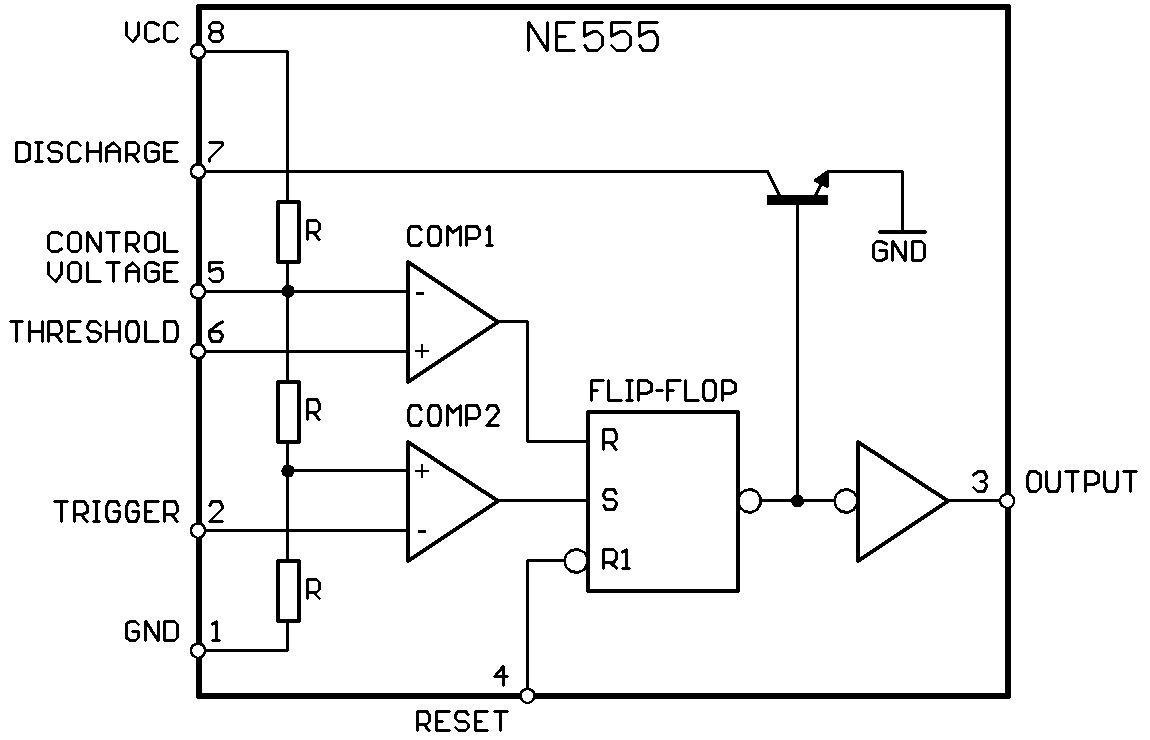
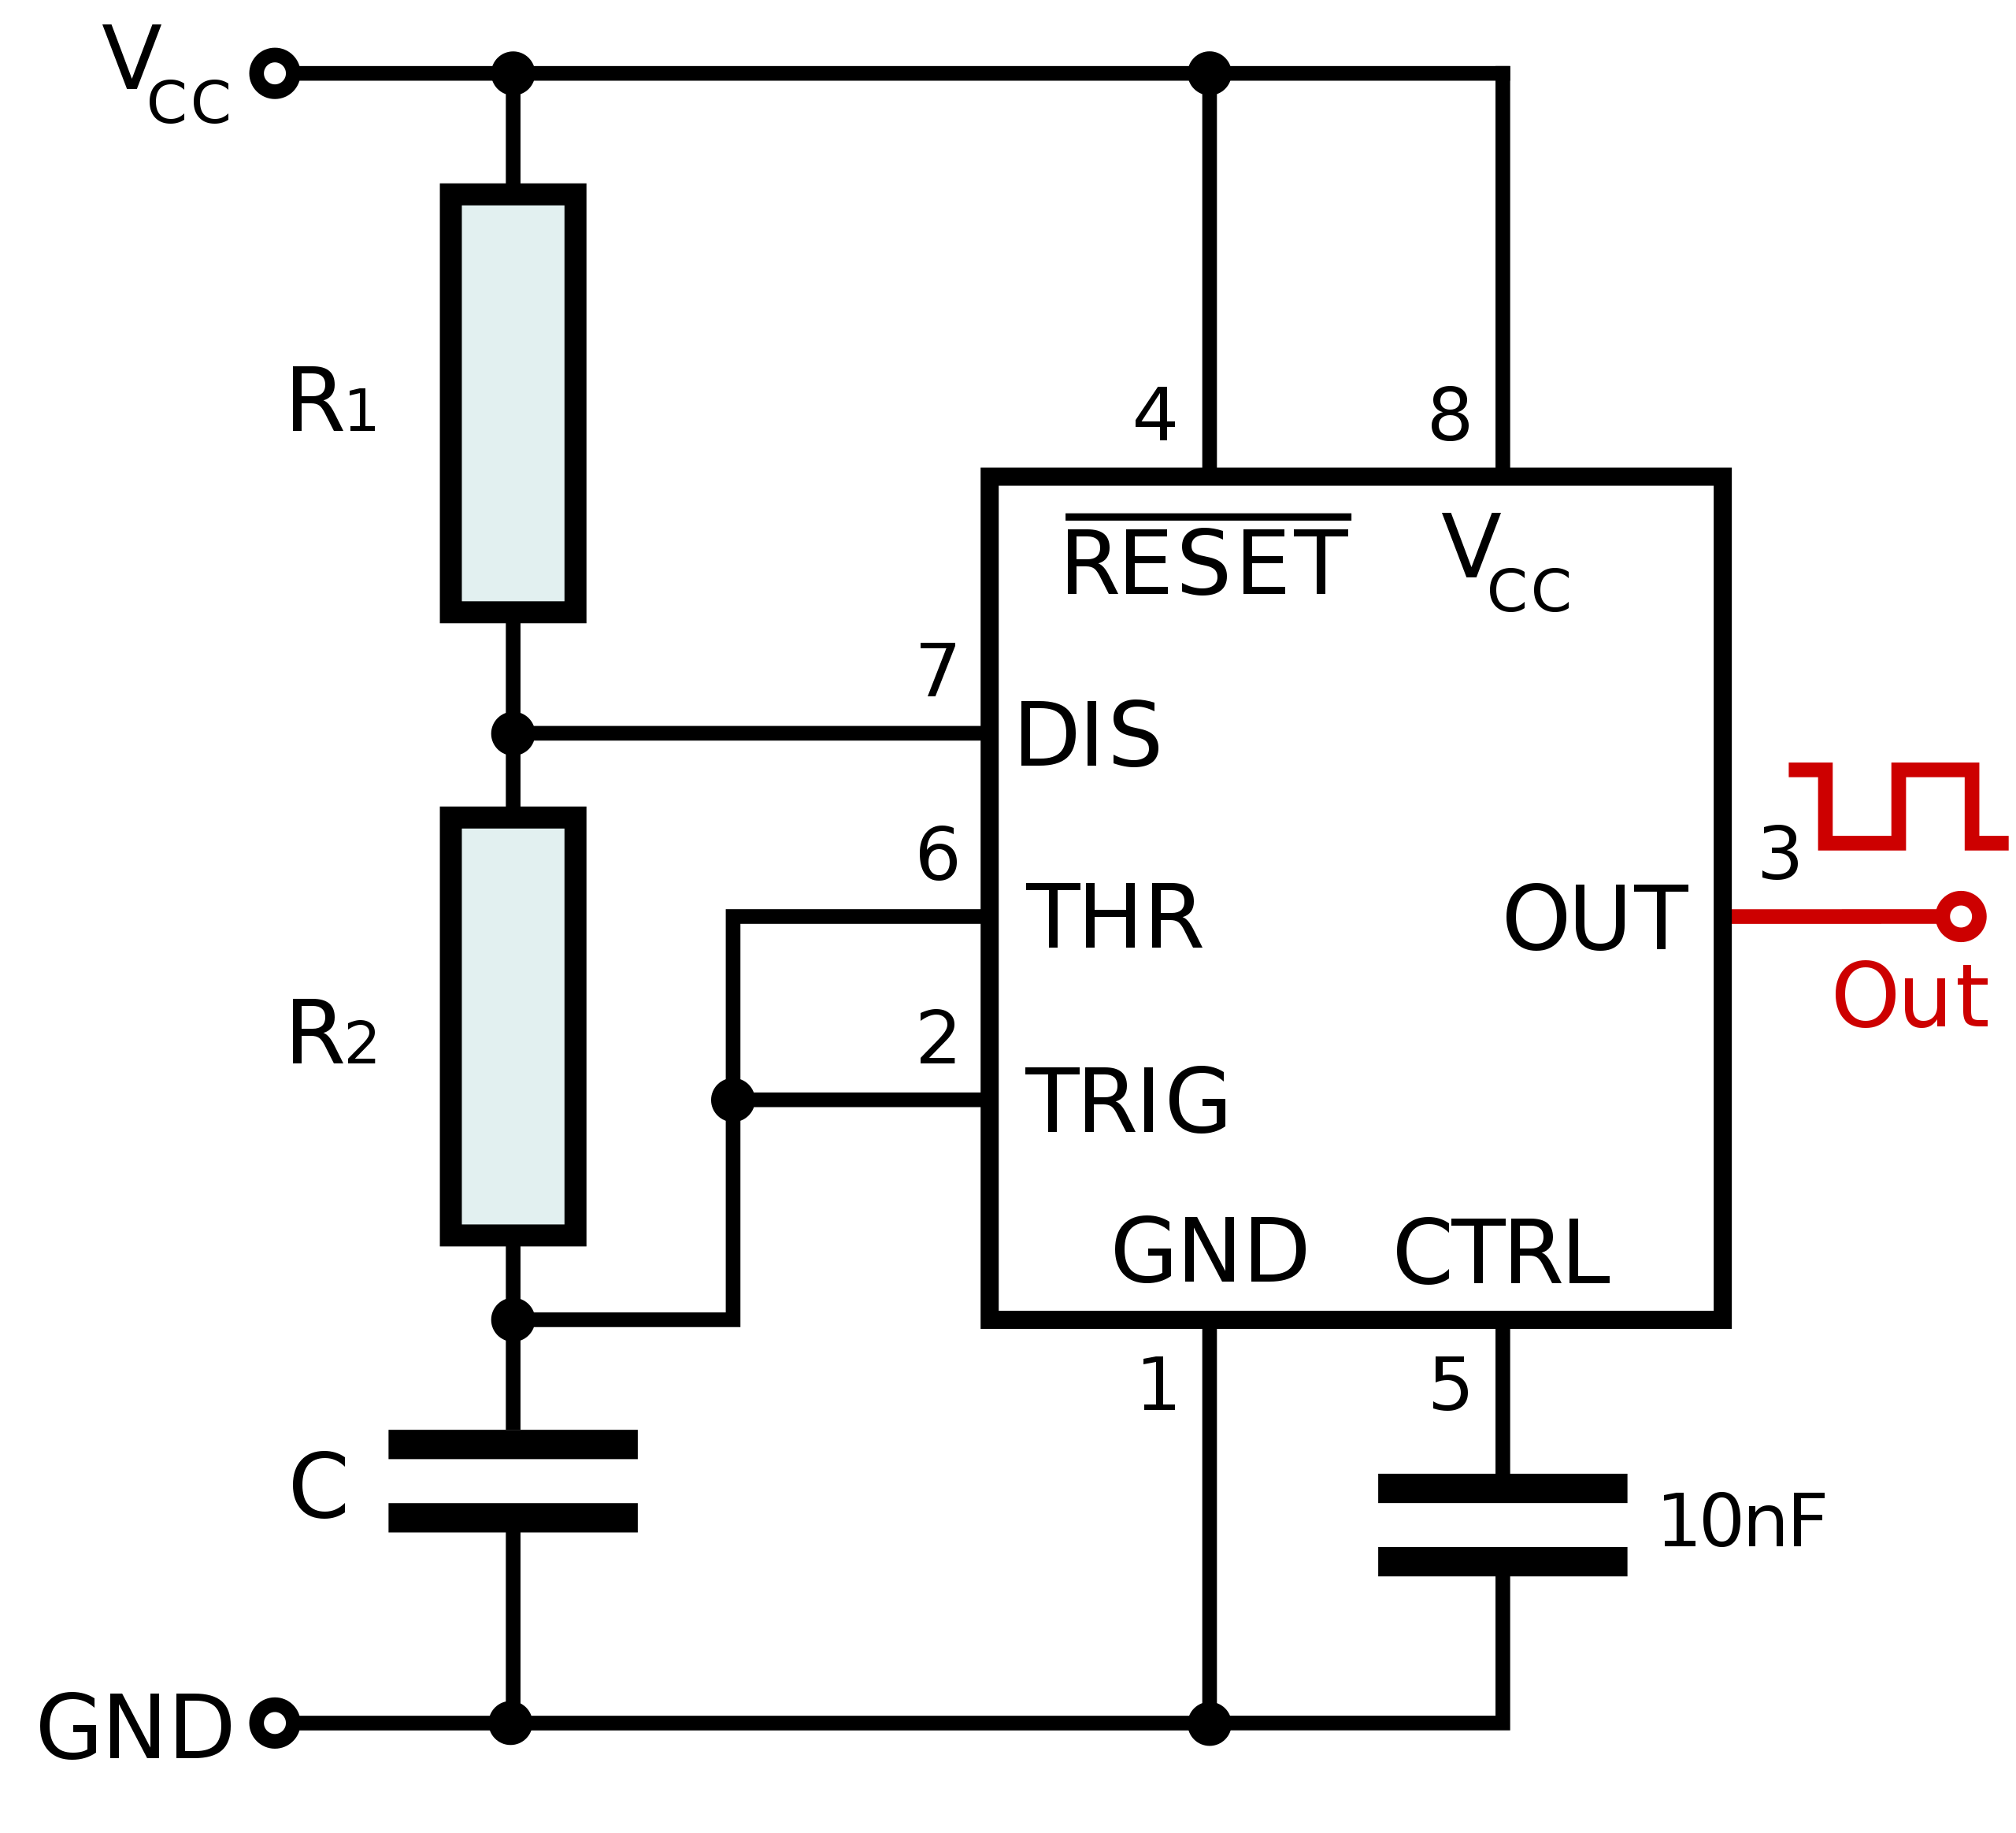

### General Application: Short-term High-power Energy Usage

An RC circuit can be used to charge a capacitor for use in a short-term and high-power circuit. This is used when the voltage source cannot supply a large amount of power, and high-power is only required for a short amount of time. Examples include:

- Solenoid (drive circuits) for mechanical switches
- Flash (in cameras)

#### Specific Application: Solenoids for PECO Model Train Switches/Turnouts

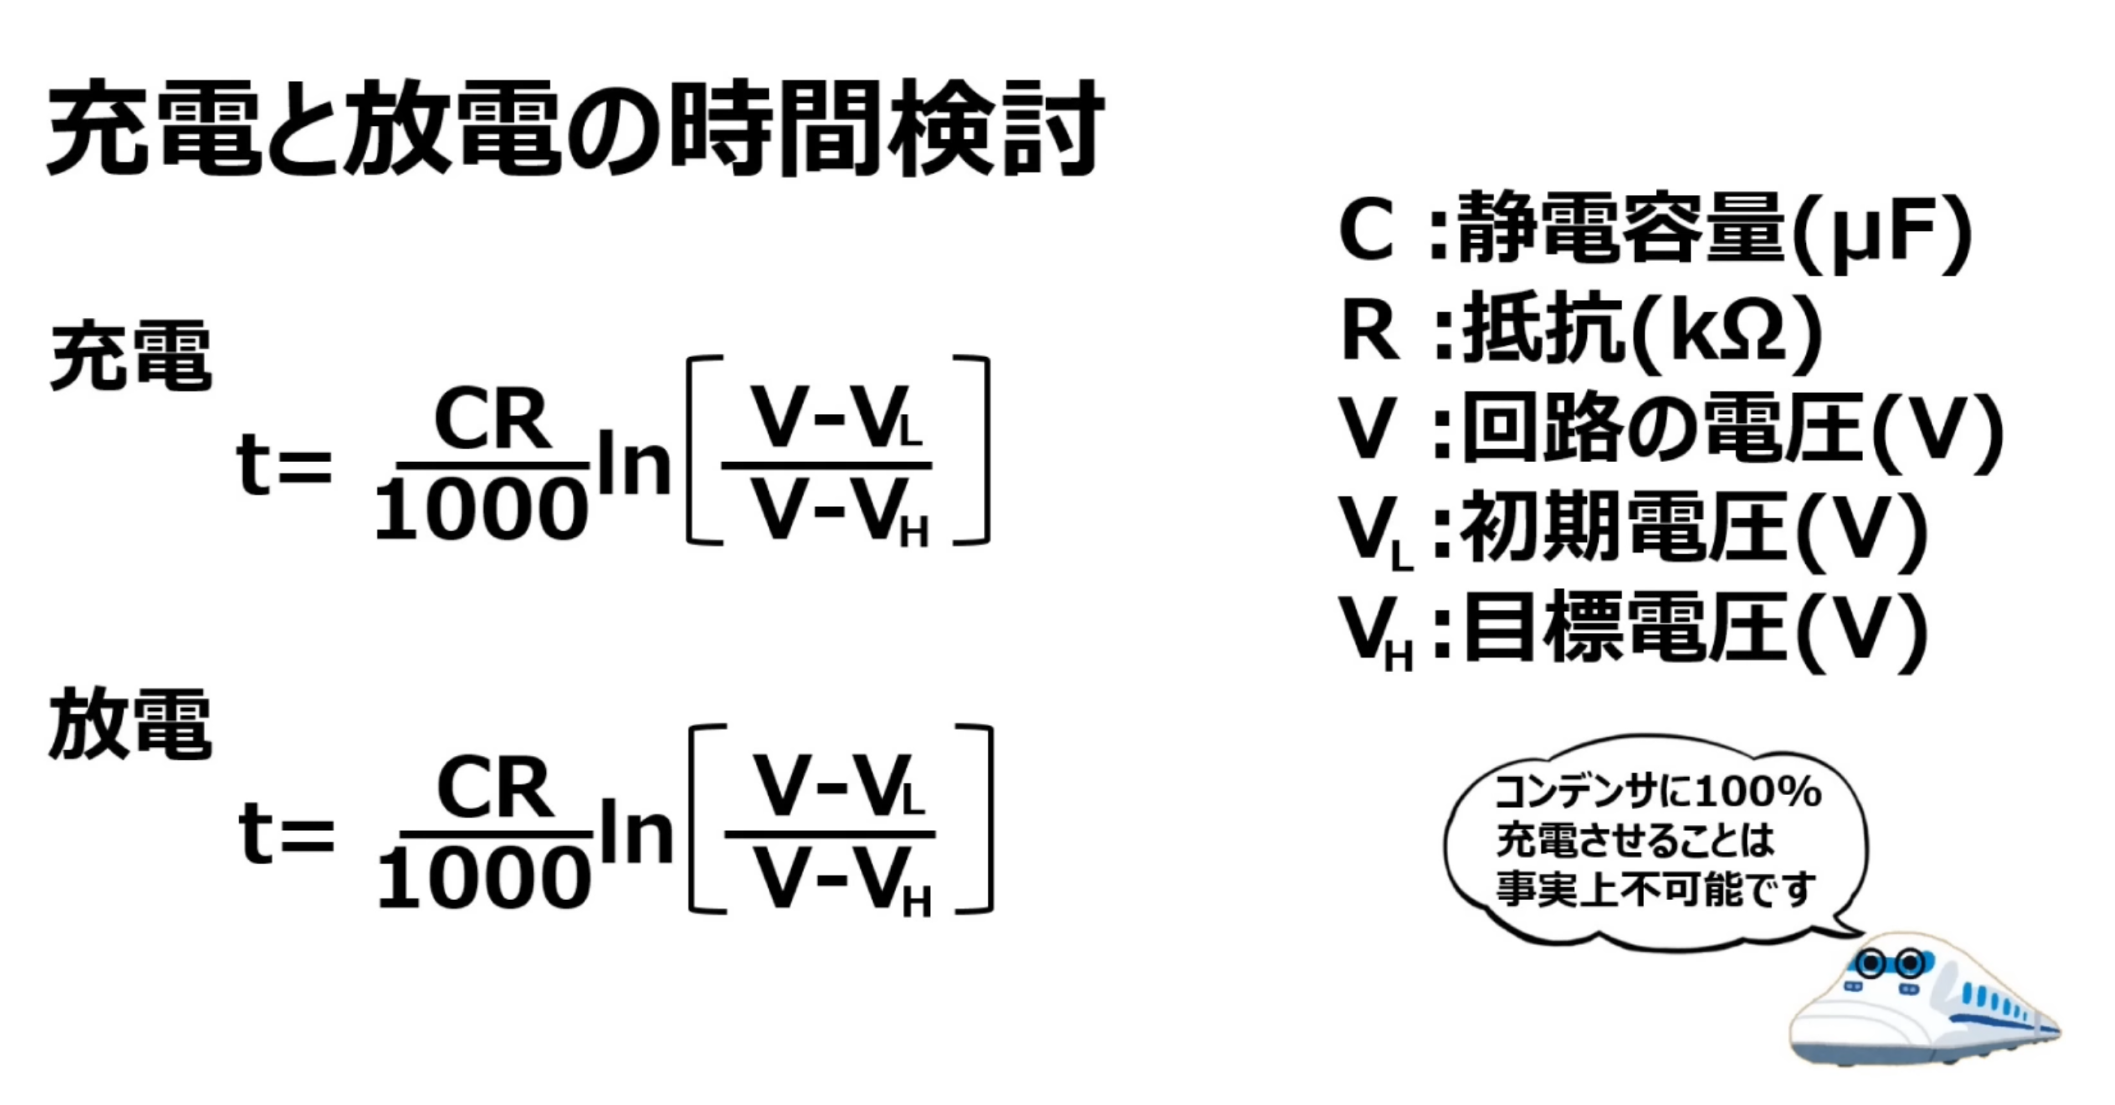
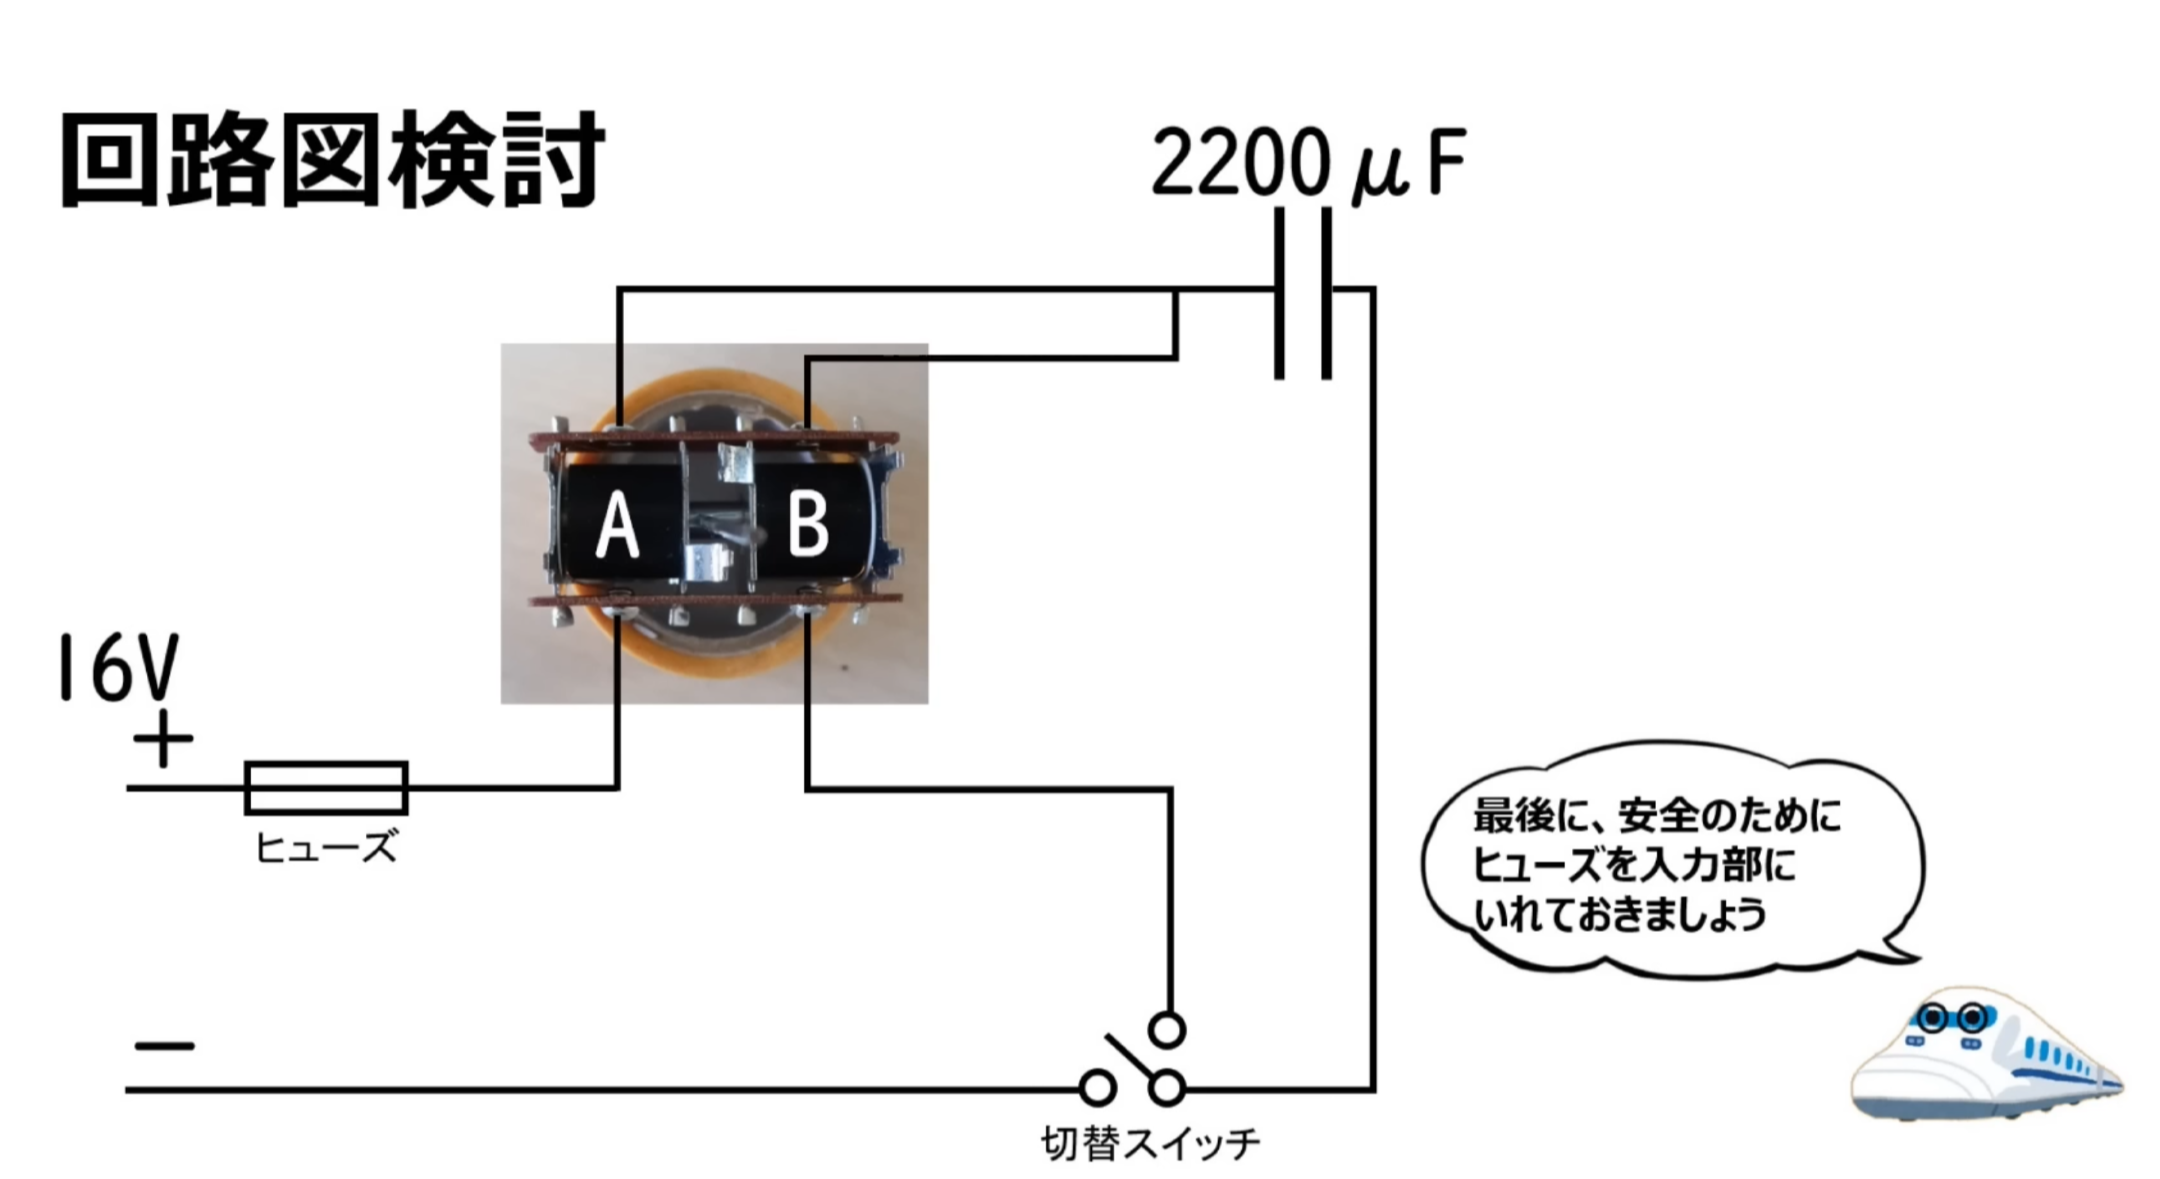

Images from \[5].

The below two applications will be explained during the presentation; there are no materials necessary.

### General Application: Removing Noise

- chattering due to buttons

## Notes

- Citations are in IEEE format, as that is the standard for electrical engineering.

## Citations

\[1] D. Johns. "Electricity/Water Analogy." ECE331F - analog electronics. https://www.eecg.toronto.edu/~johns/ece331/topicSummaries/waterAnalogy.pdf (accessed Jan 7, 2024).

\[2] D. Johns. "Circuit Review." ECE331F - analog electronics. https://www.eecg.toronto.edu/~johns/ece331/lecture_notes/01_circuitReview.pdf (accessed Jan 7, 2024).

\[3] H. Shibata, "Transistor Recipes," (in Japanese) *Torajisuta no Ryourihō*, 1st ed. Toyoshima Ward, Tōkyō Prefecture, Japan: CQ Publishing Co., Ltd., 2007.

\[4] L. Doug, "Electronics All-in-One For Dummies." Hoboken, New Jersey, United States: Wiley, 2017.

\[5] One-space Scenery (in Japanese) *Hitohira no Sukima Fūkei* "How to Use PECO Points - Introducing the cool elevated unit." YouTube. https://www.youtube.com/watch?v=8czJoKEtCnM (accessed Jan 2, 2024).

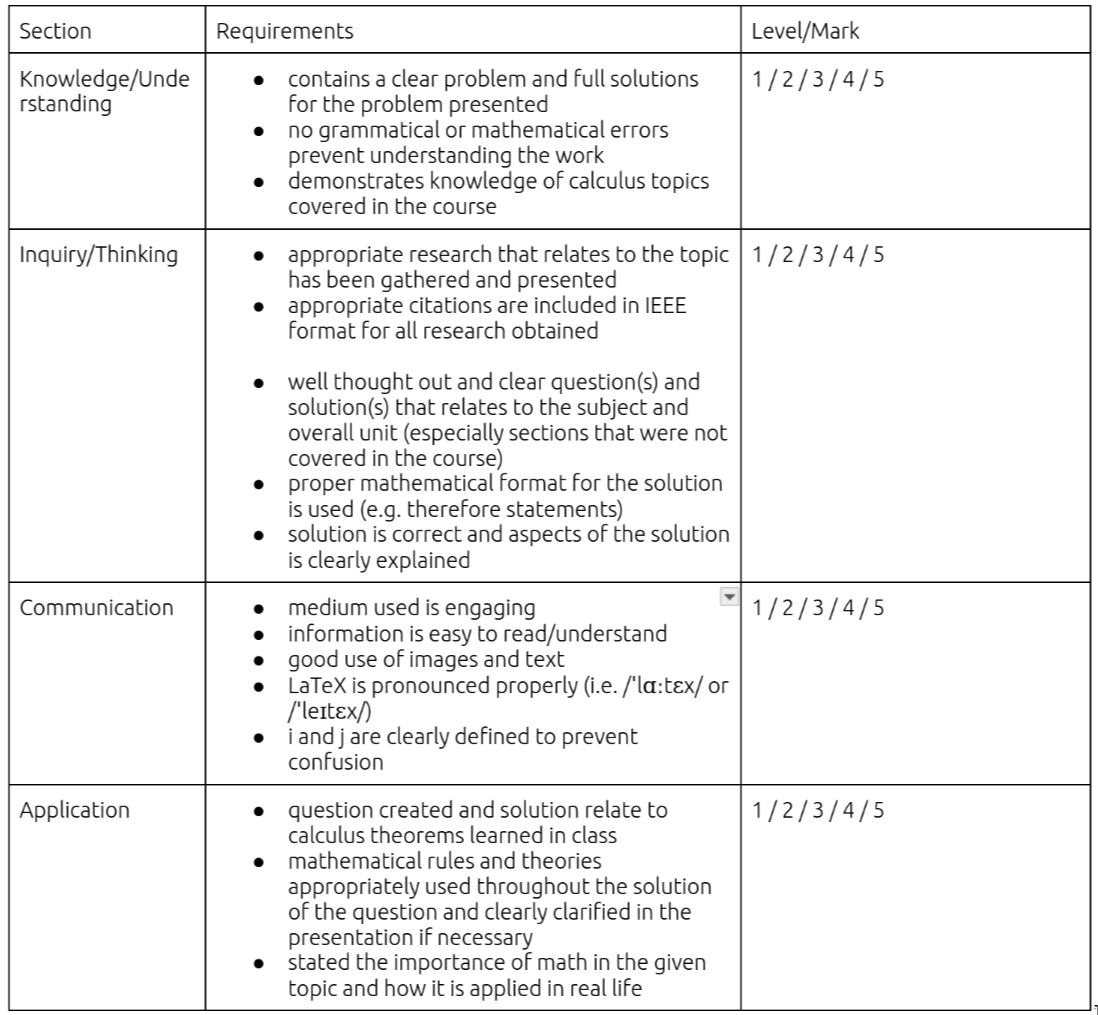